In [17]:
from fitter import Fitter, get_common_distributions, get_distributions
import os
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels
import statsmodels.api as sm
import seaborn as sns

In [2]:
def append_percentage(x, pos):
    del pos
    return str(int(x))+str('%')

def formatter(x, pos):
    del pos
    return str(int(x*100))+str('%')

In [3]:
# sns.set(
#     context="paper",
#     style="darkgrid",
#     palette="pastel",
#     rc={"figure.dpi": 150}
# )
sns.set_context("paper", font_scale=1.5)

## Load MTTU for abandoned dataset

In [4]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "abandoned"), "mttu.csv")
print (data_file)
df_mttu = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'total_duration', 'out_of_date_duration', 'ratio', 'avg_total_duration', 'avg_out_of_date_duration', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'out_of_date_duration', 'ratio', 'dependents_approx']
rows = df_mttu.shape[0]
print (df_mttu.shape)
display(df_mttu.head())

/home/imranur/security-metrics/code/visualize-data/../../data/abandoned/mttu.csv
(21670, 8)


,system_name,from_package_name,total_duration,out_of_date_duration,ratio,avg_total_duration,avg_out_of_date_duration,avg_ratio
0,NPM,borc,16428,4828,0.293888,2346.857143,689.714286,0.293888
1,NPM,@ckeditor/ckeditor5-react,2203,0,0.000000,2203.000000,0.000000,0.000000
2,NPM,cozy-ical,22601,19397,0.858236,2260.100000,1939.700000,0.858236
3,NPM,gulp-filter,13380,3340,0.249626,1115.000000,278.333333,0.249626
4,NPM,gekko,10767,5940,0.551686,978.818182,540.000000,0.551686


In [5]:
df_mttu = df_mttu.dropna()

In [6]:
display(df_mttu[['system_name', 'avg_out_of_date_duration', 'avg_ratio']].groupby(by=['system_name']).describe())

avg_out_of_date_duration                                     \
                               count        mean         std  min   25%   
system_name                                                               
NPM                          21670.0  640.016481  747.328022  0.0  43.5   

                                       avg_ratio                          \
               50%         75%     max     count      mean      std  min   
system_name                                                                
NPM          381.0  964.333333  4700.0   21670.0  0.312868  0.28056  0.0   

                                                
                  25%       50%       75%  max  
system_name                                     
NPM          0.044798  0.264906  0.499678  1.0

## Load MTTR for abandoned dataset

In [7]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "abandoned"), "mttr.csv")
print (data_file)
df_mttr = pd.read_csv(data_file,
                header=0,
                sep=',',
                on_bad_lines='skip',
                usecols=['system_name', 'from_package_name', 'total_duration', 'total_post_fix_exposure_time', 'ratio', 'avg_total_duration', 'avg_post_fix_exposure_time', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_mttr.shape[0]
print (df_mttr.shape)
display(df_mttr.head())

/home/imranur/security-metrics/code/visualize-data/../../data/abandoned/mttr.csv
(4186, 8)


,system_name,from_package_name,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,avg_post_fix_exposure_time,avg_ratio
0,NPM,pino-debug,650,79,0.121538,650.0,79.0,0.121538
1,NPM,cozy-ical,7098,2945,0.414906,3549.0,1472.5,0.414906
2,NPM,gekko,1063,128,0.120414,1063.0,128.0,0.120414
3,NPM,npm-audit-html,2193,1280,0.583675,2193.0,1280.0,0.583675
4,NPM,react-rater,2338,109,0.046621,2338.0,109.0,0.046621


In [8]:
df_mttr = df_mttr.dropna()

In [9]:
display(df_mttr[['system_name', 'avg_post_fix_exposure_time', 'avg_ratio']].groupby(by=['system_name']).describe())

avg_post_fix_exposure_time                                     \
                                 count       mean         std  min    25%   
system_name                                                                 
NPM                             4186.0  761.06517  760.519793  1.0  128.0   

                                   avg_ratio                               \
               50%     75%     max     count      mean       std      min   
system_name                                                                 
NPM          497.0  1194.0  3671.0    4186.0  0.292227  0.259236  0.00024   

                                                
                  25%       50%       75%  max  
system_name                                     
NPM          0.064524  0.221125  0.465409  1.0

## Load abandoned dataset

In [10]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "abandoned"), "widelyUsednpmPackages.csv")
print(data_file)
df_widely_used = pd.read_csv(data_file,
                             header=0,
                             sep=',',
                             on_bad_lines='skip')
print(df_widely_used.shape)
display(df_widely_used.head())

/home/imranur/security-metrics/code/visualize-data/../../data/abandoned/widelyUsednpmPackages.csv
(28100, 9)


,npmPackageName,slug,repoArchived,READMEKeyword,READMEBadge,activityBasedAbandoned,maxNumDownloads,isAbandoned,numStars
0,gitbook-plugin-search-jieba,007pig/plugin-jieba,0,0,0.0,0,20807,0,4.0
1,path-format,00Davo/path-format,0,0,0.0,0,12955,0,0.0
2,yurnalist,0x80/yurnalist,0,0,0.0,0,1773192,0,90.0
3,@0x/mesh-rpc-client,0xProject/0x-mesh,0,0,0.0,0,13243,0,258.0
4,graphql-transform-federation,0xR/graphql-transform-federation,0,0,0.0,0,29640,0,220.0


## Join the dfs

In [11]:
# Join df_mttu and df_widely_used
df_mttu_joined = pd.merge(df_mttu, df_widely_used, left_on='from_package_name', right_on='npmPackageName', how='inner')
print(df_mttu_joined.shape)
display(df_mttu_joined.head())

# Join df_mttr and df_widely_used
df_mttr_joined = pd.merge(df_mttr, df_widely_used, left_on='from_package_name', right_on='npmPackageName', how='inner')
print(df_mttr_joined.shape)
display(df_mttr_joined.head())

(21670, 17)


,system_name,from_package_name,total_duration,out_of_date_duration,ratio,avg_total_duration,avg_out_of_date_duration,avg_ratio,npmPackageName,slug,repoArchived,READMEKeyword,READMEBadge,activityBasedAbandoned,maxNumDownloads,isAbandoned,numStars
0,NPM,borc,16428,4828,0.293888,2346.857143,689.714286,0.293888,borc,dignifiedquire/borc,0,0,0.0,0,166051,0,29.0
1,NPM,@ckeditor/ckeditor5-react,2203,0,0.000000,2203.000000,0.000000,0.000000,@ckeditor/ckeditor5-react,ckeditor/ckeditor5-react,0,0,0.0,0,146091,0,407.0
2,NPM,cozy-ical,22601,19397,0.858236,2260.100000,1939.700000,0.858236,cozy-ical,cozy/cozy-ical,1,0,0.0,0,13258,1,29.0
3,NPM,gulp-filter,13380,3340,0.249626,1115.000000,278.333333,0.249626,gulp-filter,sindresorhus/gulp-filter,0,0,0.0,0,1036106,0,316.0
4,NPM,gekko,10767,5940,0.551686,978.818182,540.000000,0.551686,gekko,askmike/gekko,1,0,0.0,0,16229,1,10007.0


(4186, 17)


,system_name,from_package_name,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,avg_post_fix_exposure_time,avg_ratio,npmPackageName,slug,repoArchived,READMEKeyword,READMEBadge,activityBasedAbandoned,maxNumDownloads,isAbandoned,numStars
0,NPM,pino-debug,650,79,0.121538,650.0,79.0,0.121538,pino-debug,pinojs/pino-debug,0,0,0.0,0,24555,0,141.0
1,NPM,cozy-ical,7098,2945,0.414906,3549.0,1472.5,0.414906,cozy-ical,cozy/cozy-ical,1,0,0.0,0,13258,1,29.0
2,NPM,gekko,1063,128,0.120414,1063.0,128.0,0.120414,gekko,askmike/gekko,1,0,0.0,0,16229,1,10007.0
3,NPM,npm-audit-html,2193,1280,0.583675,2193.0,1280.0,0.583675,npm-audit-html,eventOneHQ/npm-audit-html,0,0,0.0,0,32257,0,52.0
4,NPM,react-rater,2338,109,0.046621,2338.0,109.0,0.046621,react-rater,NdYAG/react-rater,0,0,0.0,0,24583,0,189.0


## Visualization

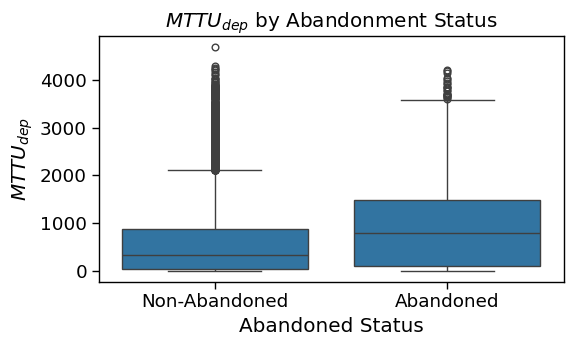

In [19]:
plt.figure(figsize=(6, 3.2))
sns.boxplot(data=df_mttu_joined, x='isAbandoned', y='avg_out_of_date_duration')
plt.xticks([0, 1], ['Non-Abandoned', 'Abandoned'])
plt.title('$MTTU_{dep}$ by Abandonment Status')
plt.xlabel('Abandoned Status')
plt.ylabel('$MTTU_{dep}$')
plt.show()

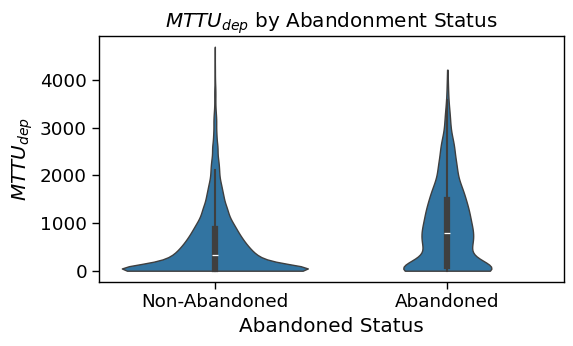

In [26]:
plt.figure(figsize=(6, 3.2))
sns.violinplot(data=df_mttu_joined, x='isAbandoned', y='avg_out_of_date_duration', cut=0)
plt.xticks([0, 1], ['Non-Abandoned', 'Abandoned'])
plt.title('$MTTU_{dep}$ by Abandonment Status')
plt.xlabel('Abandoned Status')
plt.ylabel('$MTTU_{dep}$')
plt.savefig('../../results/abandoned/mttu_abandonment_status_violin.pdf', dpi=300, bbox_inches='tight')
plt.show()

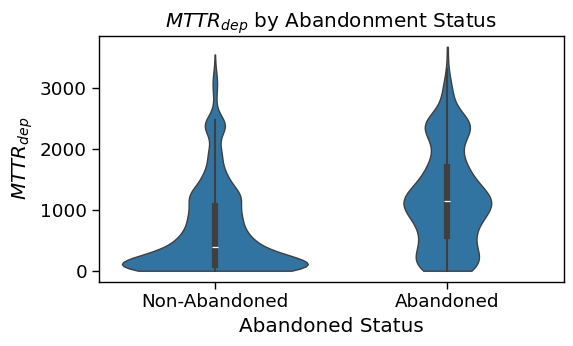

In [27]:
plt.figure(figsize=(6, 3.2))
sns.violinplot(data=df_mttr_joined, x='isAbandoned', y='avg_post_fix_exposure_time', cut=0)
plt.xticks([0, 1], ['Non-Abandoned', 'Abandoned'])
plt.title('$MTTR_{dep}$ by Abandonment Status')
plt.xlabel('Abandoned Status')
plt.ylabel('$MTTR_{dep}$')
plt.savefig('../../results/abandoned/mttr_abandonment_status_violin.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Discriminant Analysis

In [12]:
# Prepare the data
X = df_mttu_joined[['avg_out_of_date_duration']].values
y = df_mttu_joined['isAbandoned'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Fit QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)

# Print results
print("Linear Discriminant Analysis Results:")
print(classification_report(y_test, y_pred_lda))
print("\nConfusion Matrix (LDA):")
print(confusion_matrix(y_test, y_pred_lda))

print("\nQuadratic Discriminant Analysis Results:")
print(classification_report(y_test, y_pred_qda))
print("\nConfusion Matrix (QDA):")
print(confusion_matrix(y_test, y_pred_qda))

Linear Discriminant Analysis Results:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      5532
           1       0.14      0.01      0.01       969

    accuracy                           0.85      6501
   macro avg       0.49      0.50      0.46      6501
weighted avg       0.74      0.85      0.78      6501


Confusion Matrix (LDA):
[[5494   38]
 [ 963    6]]

Quadratic Discriminant Analysis Results:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5532
           1       0.28      0.08      0.12       969

    accuracy                           0.83      6501
   macro avg       0.57      0.52      0.51      6501
weighted avg       0.77      0.83      0.79      6501


Confusion Matrix (QDA):
[[5332  200]
 [ 893   76]]


In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

# Initialize models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Setup k-fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize arrays to store metrics
lda_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
qda_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Initialize undersampler
undersampler = RandomUnderSampler(random_state=42)

# Perform k-fold cross validation
for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Apply undersampling to training data
    X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)
    
    # Train and evaluate LDA
    lda.fit(X_train_res, y_train_res)
    y_pred_lda = lda.predict(X_test)
    lda_metrics['accuracy'].append(accuracy_score(y_test, y_pred_lda))
    lda_metrics['precision'].append(precision_score(y_test, y_pred_lda))
    lda_metrics['recall'].append(recall_score(y_test, y_pred_lda))
    lda_metrics['f1'].append(f1_score(y_test, y_pred_lda))
    
    # Train and evaluate QDA
    qda.fit(X_train_res, y_train_res)
    y_pred_qda = qda.predict(X_test)
    qda_metrics['accuracy'].append(accuracy_score(y_test, y_pred_qda))
    qda_metrics['precision'].append(precision_score(y_test, y_pred_qda))
    qda_metrics['recall'].append(recall_score(y_test, y_pred_qda))
    qda_metrics['f1'].append(f1_score(y_test, y_pred_qda))

# Print mean results
print("LDA Results (mean across folds):")
for metric in lda_metrics:
    print(f"{metric}: {np.mean(lda_metrics[metric]):.3f} (+/- {np.std(lda_metrics[metric]):.3f})")

print("\nQDA Results (mean across folds):")
for metric in qda_metrics:
    print(f"{metric}: {np.mean(qda_metrics[metric]):.3f} (+/- {np.std(qda_metrics[metric]):.3f})")

LDA Results (mean across folds):
accuracy: 0.684 (+/- 0.004)
precision: 0.235 (+/- 0.005)
recall: 0.507 (+/- 0.013)
f1: 0.321 (+/- 0.007)

QDA Results (mean across folds):
accuracy: 0.748 (+/- 0.002)
precision: 0.261 (+/- 0.006)
recall: 0.386 (+/- 0.017)
f1: 0.312 (+/- 0.009)


In [14]:
# Prepare the data
X = df_mttr_joined[['avg_post_fix_exposure_time']].values
y = df_mttr_joined['isAbandoned'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Setup k-fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize arrays to store metrics
lda_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
qda_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Initialize undersampler
undersampler = RandomUnderSampler(random_state=42)

# Perform k-fold cross validation
for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Apply undersampling to training data
    X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)
    
    # Train and evaluate LDA
    lda.fit(X_train_res, y_train_res)
    y_pred_lda = lda.predict(X_test)
    lda_metrics['accuracy'].append(accuracy_score(y_test, y_pred_lda))
    lda_metrics['precision'].append(precision_score(y_test, y_pred_lda))
    lda_metrics['recall'].append(recall_score(y_test, y_pred_lda))
    lda_metrics['f1'].append(f1_score(y_test, y_pred_lda))
    
    # Train and evaluate QDA
    qda.fit(X_train_res, y_train_res)
    y_pred_qda = qda.predict(X_test)
    qda_metrics['accuracy'].append(accuracy_score(y_test, y_pred_qda))
    qda_metrics['precision'].append(precision_score(y_test, y_pred_qda))
    qda_metrics['recall'].append(recall_score(y_test, y_pred_qda))
    qda_metrics['f1'].append(f1_score(y_test, y_pred_qda))

# Print mean results
print("LDA Results (mean across folds):")
for metric in lda_metrics:
    print(f"{metric}: {np.mean(lda_metrics[metric]):.3f} (+/- {np.std(lda_metrics[metric]):.3f})")

print("\nQDA Results (mean across folds):")
for metric in qda_metrics:
    print(f"{metric}: {np.mean(qda_metrics[metric]):.3f} (+/- {np.std(qda_metrics[metric]):.3f})")

LDA Results (mean across folds):
accuracy: 0.692 (+/- 0.023)
precision: 0.315 (+/- 0.028)
recall: 0.614 (+/- 0.044)
f1: 0.416 (+/- 0.035)

QDA Results (mean across folds):
accuracy: 0.709 (+/- 0.021)
precision: 0.316 (+/- 0.031)
recall: 0.541 (+/- 0.061)
f1: 0.399 (+/- 0.040)


## Historical Analysis

In [18]:
# Load historical MTTU data
mttu_data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "historical_abandoned"), "historical_abandoned_mttu.csv")
print(mttu_data_file)
df_historical_mttu = pd.read_csv(mttu_data_file,
                                header=0,
                                sep=',',
                                on_bad_lines='skip')
print("MTTU Shape:", df_historical_mttu.shape)
display(df_historical_mttu.head())

# Load historical MTTR data
mttr_data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "historical_abandoned"), "historical_abandoned_mttr.csv")
print("\n", mttr_data_file)
df_historical_mttr = pd.read_csv(mttr_data_file,
                                header=0,
                                sep=',',
                                on_bad_lines='skip')
print("MTTR Shape:", df_historical_mttr.shape)
display(df_historical_mttr.head())

/home/imranur/security-metrics/code/visualize-data/../../data/historical_abandoned/historical_abandoned_mttu.csv
MTTU Shape: (120818, 10)


,system_name,from_package_name,historical_time,total_duration,out_of_date_duration,ratio,avg_total_duration,mttu,avg_ratio,time_from_last_version
0,NPM,1broker-client,2016-10-11 10:58:14,3,0,0.0,1.0,0.0,0.0,-583
1,NPM,1broker-client,2016-10-11 21:57:34,3,0,0.0,1.0,0.0,0.0,-582
2,NPM,1broker-client,2016-10-15 04:30:45,12,0,0.0,4.0,0.0,0.0,-579
3,NPM,1broker-client,2016-10-15 08:43:47,12,0,0.0,4.0,0.0,0.0,-579
4,NPM,1broker-client,2016-10-15 09:52:06,12,0,0.0,4.0,0.0,0.0,-579



 /home/imranur/security-metrics/code/visualize-data/../../data/historical_abandoned/historical_abandoned_mttr.csv
MTTR Shape: (11426, 10)


,system_name,from_package_name,historical_time,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,mttr,avg_ratio,time_from_last_version
0,NPM,dvp-dbmodels,2015-09-29 07:06:23,8,8,1.0,8.0,8.0,1.0,-3233
1,NPM,dvp-dbmodels,2015-10-01 04:27:29,8,8,1.0,8.0,8.0,1.0,-3231
2,NPM,gdax,2016-11-09 02:17:20,223,223,1.0,111.5,111.5,1.0,-901
3,NPM,node-crux,2016-02-12 09:23:59,28,28,1.0,14.0,14.0,1.0,-185
4,NPM,dotcms-js,2017-08-01 14:30:35,172,172,1.0,172.0,172.0,1.0,-455


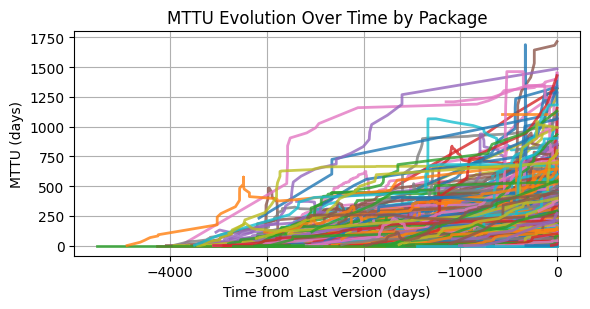

In [12]:
plt.figure(figsize=(6, 3.2))

# Calculate rolling mean for each package
unique_packages = df_historical_mttu['from_package_name'].unique()

for package in unique_packages:
    package_data = df_historical_mttu[df_historical_mttu['from_package_name'] == package]
    
    # Plot scatter points with low alpha for distribution
    # plt.scatter(package_data['time_from_last_version'], 
    #            package_data['mttu'], 
    #            alpha=0.2,
    #            s=20,
    #            label=package)
    
    # Calculate and plot rolling mean
    rolling_mean = package_data.sort_values('time_from_last_version').rolling(window=10, min_periods=1)['mttu'].mean()
    plt.plot(package_data.sort_values('time_from_last_version')['time_from_last_version'], 
            rolling_mean, 
            linewidth=2,
            alpha=0.8)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel('Time from Last Version (days)')
plt.ylabel('MTTU (days)')
plt.title('MTTU Evolution Over Time by Package')
# plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_749554/3551009157.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('time_bins')


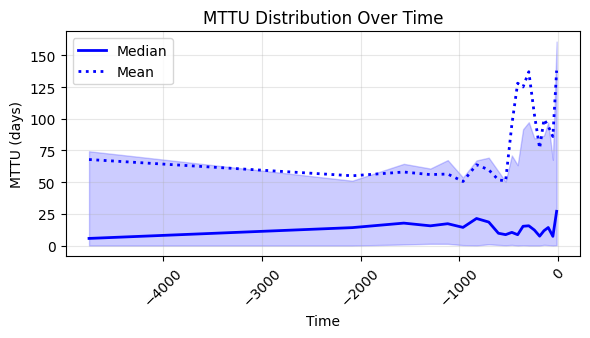

In [15]:
plt.figure(figsize=(6, 3.2))

# Calculate moving statistics for each month
df_historical_mttu['time_bins'] = pd.qcut(df_historical_mttu['time_from_last_version'], q=20)
monthly_stats = (df_historical_mttu
    .groupby('time_bins')
    .agg({'mttu': ['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]})
    .reset_index()
)

# Flatten the multi-level columns
monthly_stats.columns = ['time_bins', 'mean', 'median', '25%', '75%']
monthly_stats.index = monthly_stats['time_bins'].apply(lambda x: x.left)

# Plot the median line
plt.plot(monthly_stats.index, monthly_stats['median'], 
         label='Median', linewidth=2, color='blue')

# Plot the mean line
plt.plot(monthly_stats.index, monthly_stats['mean'], 
         label='Mean', linewidth=2, linestyle=':', color='blue')

# Fill between 25th and 75th percentiles
plt.fill_between(monthly_stats.index, 
                monthly_stats['25%'], 
                monthly_stats['75%'],
                alpha=0.2, color='blue')

plt.xlabel('Time')
plt.ylabel('MTTU (days)')
plt.title('MTTU Distribution Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

/tmp/ipykernel_749554/293019164.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('time_bins')


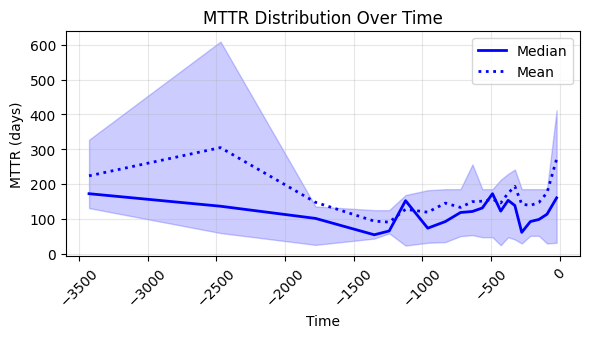

In [20]:
plt.figure(figsize=(6, 3.2))

# Calculate moving statistics for each month
df_historical_mttr['time_bins'] = pd.qcut(df_historical_mttr['time_from_last_version'], q=20)
monthly_stats = (df_historical_mttr
    .groupby('time_bins')
    .agg({'mttr': ['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]})
    .reset_index()
)

# Flatten the multi-level columns
monthly_stats.columns = ['time_bins', 'mean', 'median', '25%', '75%']
monthly_stats.index = monthly_stats['time_bins'].apply(lambda x: x.left)

# Plot the median line
plt.plot(monthly_stats.index, monthly_stats['median'], 
         label='Median', linewidth=2, color='blue')

# Plot the mean line
plt.plot(monthly_stats.index, monthly_stats['mean'], 
         label='Mean', linewidth=2, linestyle=':', color='blue')

# Fill between 25th and 75th percentiles
plt.fill_between(monthly_stats.index, 
                monthly_stats['25%'], 
                monthly_stats['75%'],
                alpha=0.2, color='blue')

plt.xlabel('Time')
plt.ylabel('MTTR (days)')
plt.title('MTTR Distribution Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()